In [2]:
import urllib.request
import json
import pandas as pd
import bs4
import numpy as np

In [231]:
B = pd.read_excel('./export/res_burgerking.xlsx')
M = pd.read_excel('./export/res_mcdonalds.xlsx')
K = pd.read_excel('./export/res_kfc.xlsx')
L = pd.read_excel('./export/res_lotteria.xlsx')
MS = pd.read_excel('./export/res_momstouch.xlsx')
B.head()

,0
경기도 수원시,13
서울특별시 강남구,13
경기도 성남시,8
서울특별시 중구,8
경기도 고양시,7


In [232]:
tmp = pd.read_excel("./data/인구_서울특별시.xlsx", usecols=[0,1], names=["d1d2d3", "population"])
tmp['d1'], tmp['d2d3'] = tmp['d1d2d3'].str.split(' ', 1).str
tmp['d2'], tmp['d3'] = tmp['d2d3'].str.split(' ', 1).str
tmp = tmp[3:]

In [233]:
district = pd.DataFrame({'d1': tmp.d1, 'd2': tmp.d2, 'd3': tmp.d3, 'population': tmp.population})

In [234]:
def get_distDF(loc):
    filename = "./data/인구_" + loc + ".xlsx"
    tmp = pd.read_excel(filename, usecols=[0,1], names=["d1d2d3", "population"])
    tmp['d1'], tmp['d2d3'] = tmp['d1d2d3'].str.split(' ', 1).str
    tmp['d2'], tmp['d3'] = tmp['d2d3'].str.split(' ', 1).str
    tmp = tmp[3:]
    dist = pd.DataFrame({'d1': tmp.d1, 'd2': tmp.d2, 'd3': tmp.d3, 'population': tmp.population})
    return dist

In [235]:
locs = ["강원도", "경기도", "경상남도", "경상북도", "광주광역시", "대구광역시", "대전광역시", "부산광역시", "세종특별자치시", "울산광역시", "인천광역시", "전라남도", "전라북도", "제주특별자치도", "충청남도", "충청북도"]
for loc in locs:
    district = district.append(get_distDF(loc), ignore_index=True)

In [236]:
district.head()

,d1,d2,d3,population
0,서울특별시,종로구,(1111000000),"152,778"
1,서울특별시,중구,(1114000000),"125,942"
2,서울특별시,용산구,(1117000000),"229,168"
3,서울특별시,성동구,(1120000000),"306,404"
4,서울특별시,광진구,(1121500000),"354,873"


In [237]:
district.index = district.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1)

In [238]:
district = district[district['d3'].str.startswith("(")]

In [239]:
district[district['d2']=="수원시"]

,d1,d2,d3,population
경기도 수원시,경기도,수원시,(4111000000),"1,199,599"


In [240]:
bgt = pd.DataFrame({'B': B[0], 'M': M[0], 'K': K[0], 'L': L[0], 'MS': MS[0]}).fillna(0)
bgt = pd.merge(district, bgt, how='outer', left_index=True, right_index=True)
bgt.head()

,d1,d2,d3,population,B,M,K,L,MS
강원도 강릉시,강원도,강릉시,(4215000000),"212,718",1.0,1.0,0.0,6.0,8.0
강원도 고성군,강원도,고성군,(4282000000),"27,936",0.0,0.0,0.0,1.0,1.0
강원도 동해시,강원도,동해시,(4217000000),"90,885",0.0,0.0,0.0,3.0,3.0
강원도 삼척시,강원도,삼척시,(4223000000),"67,893",0.0,0.0,0.0,1.0,2.0
강원도 속초시,강원도,속초시,(4221000000),"81,438",1.0,1.0,0.0,3.0,3.0


In [241]:
bgt[bgt['d1'].isnull()]

,d1,d2,d3,population,B,M,K,L,MS
광주광역시 거제시,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
광주광역시 김해시,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.0
광주광역시 진주시,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.0
광주광역시 창녕군,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
광주광역시 창원시,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.0
광주광역시 통영시,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.0
부산 광역시,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0
부산광역시 진구,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.0
서울시 영등포구,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0
세종특별자치시 나성동,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0


In [242]:
bgt[bgt['d1']=="세종특별자치시"]

,d1,d2,d3,population,B,M,K,L,MS
세종특별자치시 세종특별자치시,세종특별자치시,세종특별자치시,(3611000000),"322,693",0.0,0.0,0.0,0.0,15.0


In [243]:
bgidx_cols = ['B', 'M', 'K', 'L', 'MS']
bgt.loc['경상남도 거제시', bgidx_cols] += bgt.loc['광주광역시 거제시', bgidx_cols]
bgt.loc['경상남도 김해시', bgidx_cols] += bgt.loc['광주광역시 김해시', bgidx_cols]
bgt.loc['경상남도 진주시', bgidx_cols] += bgt.loc['광주광역시 진주시', bgidx_cols]
bgt.loc['경상남도 창녕군', bgidx_cols] += bgt.loc['광주광역시 창녕군', bgidx_cols]
bgt.loc['경상남도 창원시', bgidx_cols] += bgt.loc['광주광역시 창원시', bgidx_cols]
bgt.loc['경상남도 통영시', bgidx_cols] += bgt.loc['광주광역시 통영시', bgidx_cols]
bgt.loc['부산광역시 남구', bgidx_cols] += bgt.loc['부산 광역시', bgidx_cols]
bgt.loc['부산광역시 부산진구', bgidx_cols] += bgt.loc['부산광역시 진구', bgidx_cols]

bgt.loc['세종특별자치시 세종특별자치시', bgidx_cols] += bgt.loc['세종특별자치시 나성동', bgidx_cols]
bgt.loc['세종특별자치시 세종특별자치시', bgidx_cols] += bgt.loc['세종특별자치시 부강면', bgidx_cols]
bgt.loc['세종특별자치시 세종특별자치시', bgidx_cols] += bgt.loc['세종특별자치시 절재로', bgidx_cols]
bgt.loc['세종특별자치시 세종특별자치시', bgidx_cols] += bgt.loc['세종특별자치시 조치원읍', bgidx_cols]
bgt.loc['세종특별자치시 세종특별자치시', bgidx_cols] += bgt.loc['세종특별자치시 종촌동', bgidx_cols]
bgt.loc['울산광역시 중구', bgidx_cols] += bgt.loc['울산광역시 유곡동', bgidx_cols]
bgt.loc['인천광역시 미추홀구', bgidx_cols] += bgt.loc['인천광역시 남구', bgidx_cols]
bgt.loc['전라남도 여수시', bgidx_cols] += bgt.loc['전라북도 여수시', bgidx_cols]
bgt.loc['세종특별자치시 세종특별자치시', bgidx_cols] += bgt.loc['충청남도 세종시', bgidx_cols]
bgt.loc['충청북도 청주시', bgidx_cols] += bgt.loc['충청북도 청원군', bgidx_cols]

In [244]:
bgt = bgt[~bgt['d1'].isnull()].fillna(0)

In [245]:
bgt[(bgt['L'] == 0) & (bgt['MS'] == 0) & (bgt['B'] + bgt['M'] + bgt['K'] > 0)]

,d1,d2,d3,population,B,M,K,L,MS


In [246]:
bgt[(bgt['B'] + bgt['M'] + bgt['K'] + bgt['L'] + bgt['MS'] == 0)]

,d1,d2,d3,population,B,M,K,L,MS
강원도 양양군,강원도,양양군,(4283000000),"27,431",0.0,0.0,0.0,0.0,0.0
경상북도 영양군,경상북도,영양군,(4776000000),"17,206",0.0,0.0,0.0,0.0,0.0
경상북도 청송군,경상북도,청송군,(4775000000),"25,657",0.0,0.0,0.0,0.0,0.0
전라남도 신안군,전라남도,신안군,(4691000000),"41,033",0.0,0.0,0.0,0.0,0.0


In [247]:
bgt['BMK'] = bgt['B'] + bgt['M'] + bgt['K']
bgt['LMS'] = bgt['L'] + bgt['MS']
bgt['OldBgIdx'] = bgt['BMK'] / bgt['L']
bgt['NewBgIdx'] = bgt['BMK'] / bgt['LMS']

In [248]:
bgt['NewBgIdx2'] = (bgt['BMK'] + bgt['LMS']*0.37) / bgt['LMS']

In [249]:
bgt = bgt.sort_values(by='OldBgIdx', ascending=False)
bgt.head(10)

,d1,d2,d3,population,B,M,K,L,MS,BMK,LMS,OldBgIdx,NewBgIdx,NewBgIdx2
서울특별시 서초구,서울특별시,서초구,(1165000000),"432,762",7.0,6.0,10.0,5.0,1.0,23.0,6.0,4.600000,3.833333,4.203333
서울특별시 강남구,서울특별시,강남구,(1168000000),"541,854",13.0,10.0,7.0,9.0,4.0,30.0,13.0,3.333333,2.307692,2.677692
서울특별시 종로구,서울특별시,종로구,(1111000000),"152,778",3.0,5.0,5.0,4.0,3.0,13.0,7.0,3.250000,1.857143,2.227143
서울특별시 중구,서울특별시,중구,(1114000000),"125,942",8.0,3.0,0.0,4.0,2.0,11.0,6.0,2.750000,1.833333,2.203333
서울특별시 서대문구,서울특별시,서대문구,(1141000000),"311,771",5.0,3.0,2.0,4.0,4.0,10.0,8.0,2.500000,1.250000,1.620000
경상남도 사천시,경상남도,사천시,(4824000000),"113,175",1.0,1.0,0.0,1.0,4.0,2.0,5.0,2.000000,0.400000,0.770000
경기도 광명시,경기도,광명시,(4121000000),"324,730",3.0,5.0,2.0,5.0,4.0,10.0,9.0,2.000000,1.111111,1.481111
서울특별시 금천구,서울특별시,금천구,(1154500000),"233,981",4.0,4.0,2.0,5.0,2.0,10.0,7.0,2.000000,1.428571,1.798571
서울특별시 마포구,서울특별시,마포구,(1144000000),"375,106",5.0,4.0,1.0,5.0,3.0,10.0,8.0,2.000000,1.250000,1.620000
강원도 홍천군,강원도,홍천군,(4272000000),"69,695",2.0,0.0,0.0,1.0,1.0,2.0,2.0,2.000000,1.000000,1.370000


In [250]:
bgt = bgt.sort_values(by='NewBgIdx', ascending=False)
bgt.head(10)

,d1,d2,d3,population,B,M,K,L,MS,BMK,LMS,OldBgIdx,NewBgIdx,NewBgIdx2
서울특별시 서초구,서울특별시,서초구,(1165000000),"432,762",7.0,6.0,10.0,5.0,1.0,23.0,6.0,4.600000,3.833333,4.203333
서울특별시 강남구,서울특별시,강남구,(1168000000),"541,854",13.0,10.0,7.0,9.0,4.0,30.0,13.0,3.333333,2.307692,2.677692
서울특별시 종로구,서울특별시,종로구,(1111000000),"152,778",3.0,5.0,5.0,4.0,3.0,13.0,7.0,3.250000,1.857143,2.227143
서울특별시 중구,서울특별시,중구,(1114000000),"125,942",8.0,3.0,0.0,4.0,2.0,11.0,6.0,2.750000,1.833333,2.203333
서울특별시 금천구,서울특별시,금천구,(1154500000),"233,981",4.0,4.0,2.0,5.0,2.0,10.0,7.0,2.000000,1.428571,1.798571
서울특별시 서대문구,서울특별시,서대문구,(1141000000),"311,771",5.0,3.0,2.0,4.0,4.0,10.0,8.0,2.500000,1.250000,1.620000
서울특별시 마포구,서울특별시,마포구,(1144000000),"375,106",5.0,4.0,1.0,5.0,3.0,10.0,8.0,2.000000,1.250000,1.620000
경기도 광명시,경기도,광명시,(4121000000),"324,730",3.0,5.0,2.0,5.0,4.0,10.0,9.0,2.000000,1.111111,1.481111
서울특별시 강북구,서울특별시,강북구,(1130500000),"317,386",1.0,5.0,1.0,4.0,3.0,7.0,7.0,1.750000,1.000000,1.370000
경기도 군포시,경기도,군포시,(4141000000),"275,586",1.0,3.0,1.0,3.0,2.0,5.0,5.0,1.666667,1.000000,1.370000


In [254]:
bgt = bgt.sort_values(by='NewBgIdx2', ascending=False)
bgt.head(10)

,d1,d2,d3,population,B,M,K,L,MS,BMK,LMS,OldBgIdx,NewBgIdx,NewBgIdx2
서울특별시 서초구,서울특별시,서초구,(1165000000),"432,762",7.0,6.0,10.0,5.0,1.0,23.0,6.0,4.600000,3.833333,4.203333
서울특별시 강남구,서울특별시,강남구,(1168000000),"541,854",13.0,10.0,7.0,9.0,4.0,30.0,13.0,3.333333,2.307692,2.677692
서울특별시 종로구,서울특별시,종로구,(1111000000),"152,778",3.0,5.0,5.0,4.0,3.0,13.0,7.0,3.250000,1.857143,2.227143
서울특별시 중구,서울특별시,중구,(1114000000),"125,942",8.0,3.0,0.0,4.0,2.0,11.0,6.0,2.750000,1.833333,2.203333
서울특별시 금천구,서울특별시,금천구,(1154500000),"233,981",4.0,4.0,2.0,5.0,2.0,10.0,7.0,2.000000,1.428571,1.798571
서울특별시 서대문구,서울특별시,서대문구,(1141000000),"311,771",5.0,3.0,2.0,4.0,4.0,10.0,8.0,2.500000,1.250000,1.620000
서울특별시 마포구,서울특별시,마포구,(1144000000),"375,106",5.0,4.0,1.0,5.0,3.0,10.0,8.0,2.000000,1.250000,1.620000
경기도 광명시,경기도,광명시,(4121000000),"324,730",3.0,5.0,2.0,5.0,4.0,10.0,9.0,2.000000,1.111111,1.481111
강원도 홍천군,강원도,홍천군,(4272000000),"69,695",2.0,0.0,0.0,1.0,1.0,2.0,2.0,2.000000,1.000000,1.370000
서울특별시 강북구,서울특별시,강북구,(1130500000),"317,386",1.0,5.0,1.0,4.0,3.0,7.0,7.0,1.750000,1.000000,1.370000


In [173]:
bgt[bgt['d1']=="세종특별자치시"]

,d1,d2,d3,population,B,M,K,L,MS,BMK,LMS,OldBgIdx,NewBgIdx
세종특별자치시 세종특별자치시,세종특별자치시,세종특별자치시,(3611000000),"322,693",3.0,0.0,1.0,6.0,15.0,4.0,21.0,0.666667,0.190476


In [207]:
def short_distr(name):
    wide, narrow = name.split()
    if narrow == '세종특별자치시': 
        return '세종'
    elif wide.endswith('광역시'):
        return wide[:2] + (narrow[:-1] if len(narrow) > 2 else narrow)
    elif narrow.endswith('구'):
        return wide[:2] + (narrow[:-1] if len(narrow) > 2 else narrow)
    elif narrow == '고성군': # 고성군은 강원도, 경상남도에 있다.
        return '고성({})'.format({'강원도': '강원', '경상남도': '경남'}[wide])
    else:
        return narrow[:-1]

In [255]:
bgt['shortname'] = list(map(short_distr, bgt.index))
bgt.head()

,d1,d2,d3,population,B,M,K,L,MS,BMK,LMS,OldBgIdx,NewBgIdx,NewBgIdx2,shortname
서울특별시 서초구,서울특별시,서초구,(1165000000),"432,762",7.0,6.0,10.0,5.0,1.0,23.0,6.0,4.600000,3.833333,4.203333,서울서초
서울특별시 강남구,서울특별시,강남구,(1168000000),"541,854",13.0,10.0,7.0,9.0,4.0,30.0,13.0,3.333333,2.307692,2.677692,서울강남
서울특별시 종로구,서울특별시,종로구,(1111000000),"152,778",3.0,5.0,5.0,4.0,3.0,13.0,7.0,3.250000,1.857143,2.227143,서울종로
서울특별시 중구,서울특별시,중구,(1114000000),"125,942",8.0,3.0,0.0,4.0,2.0,11.0,6.0,2.750000,1.833333,2.203333,서울중구
서울특별시 금천구,서울특별시,금천구,(1154500000),"233,981",4.0,4.0,2.0,5.0,2.0,10.0,7.0,2.000000,1.428571,1.798571,서울금천


In [176]:
blockpositions = pd.read_excel('./data/block_map.xlsx', header=None, usecols=range(15))
blockpositions.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,서울도봉,서울노원,연천,포천,속초,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양,서울강북,서울성북,동두천,양주,인제,양양,NaN,NaN,NaN
3,NaN,인천강화,김포,광명,서울은평,서울서대문,서울종로,의정부,남양주,가평,춘천,NaN,NaN,NaN
4,NaN,인천서구,부천,안양,서울강서,서울마포,서울중구,서울동대문,서울중랑,구리,홍천,강릉,NaN,NaN


In [256]:
flatrows = []
for y, colcities in blockpositions.iterrows():
    for x, city in colcities.iteritems():
        if isinstance(city, str):
            flatrows.append((x, y, city))

blockpositions_tbl = pd.DataFrame(flatrows, columns=('x', 'y', 'city')).set_index('city').sort_index()
bgtb = pd.merge(bgt, blockpositions_tbl, how='left', left_on='shortname', right_index=True)
bgtb.head()

,d1,d2,d3,population,B,M,K,L,MS,BMK,LMS,OldBgIdx,NewBgIdx,NewBgIdx2,shortname,x,y
서울특별시 서초구,서울특별시,서초구,(1165000000),"432,762",7.0,6.0,10.0,5.0,1.0,23.0,6.0,4.600000,3.833333,4.203333,서울서초,6,6
서울특별시 강남구,서울특별시,강남구,(1168000000),"541,854",13.0,10.0,7.0,9.0,4.0,30.0,13.0,3.333333,2.307692,2.677692,서울강남,6,7
서울특별시 종로구,서울특별시,종로구,(1111000000),"152,778",3.0,5.0,5.0,4.0,3.0,13.0,7.0,3.250000,1.857143,2.227143,서울종로,6,3
서울특별시 중구,서울특별시,중구,(1114000000),"125,942",8.0,3.0,0.0,4.0,2.0,11.0,6.0,2.750000,1.833333,2.203333,서울중구,6,4
서울특별시 금천구,서울특별시,금천구,(1154500000),"233,981",4.0,4.0,2.0,5.0,2.0,10.0,7.0,2.000000,1.428571,1.798571,서울금천,5,7


In [257]:
bgtb[bgtb['x'].apply(np.isnan)]

,d1,d2,d3,population,B,M,K,L,MS,BMK,LMS,OldBgIdx,NewBgIdx,NewBgIdx2,shortname,x,y


In [258]:
import locale
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')

'Korean_Korea.949'

In [259]:
bgtb['population'] = bgtb['population'].apply(atof)

In [260]:
bgtb[(bgtb['LMS']==0)]

,d1,d2,d3,population,B,M,K,L,MS,BMK,LMS,OldBgIdx,NewBgIdx,NewBgIdx2,shortname,x,y
강원도 양양군,강원도,양양군,(4283000000),27431.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,양양,10,2
경상북도 영양군,경상북도,영양군,(4776000000),17206.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,영양,11,10
경상북도 청송군,경상북도,청송군,(4775000000),25657.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,청송,11,11
전라남도 신안군,전라남도,신안군,(4691000000),41033.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,신안,0,19


In [267]:
bgtb.sort_values(by='NewBgIdx2', ascending=False).head(10)

,d1,d2,d3,population,B,M,K,L,MS,BMK,LMS,OldBgIdx,NewBgIdx,NewBgIdx2,shortname,x,y
서울특별시 서초구,서울특별시,서초구,(1165000000),432762.0,7.0,6.0,10.0,5.0,1.0,23.0,6.0,4.600000,3.833333,4.203333,서울서초,6,6
서울특별시 강남구,서울특별시,강남구,(1168000000),541854.0,13.0,10.0,7.0,9.0,4.0,30.0,13.0,3.333333,2.307692,2.677692,서울강남,6,7
서울특별시 종로구,서울특별시,종로구,(1111000000),152778.0,3.0,5.0,5.0,4.0,3.0,13.0,7.0,3.250000,1.857143,2.227143,서울종로,6,3
서울특별시 중구,서울특별시,중구,(1114000000),125942.0,8.0,3.0,0.0,4.0,2.0,11.0,6.0,2.750000,1.833333,2.203333,서울중구,6,4
서울특별시 금천구,서울특별시,금천구,(1154500000),233981.0,4.0,4.0,2.0,5.0,2.0,10.0,7.0,2.000000,1.428571,1.798571,서울금천,5,7
서울특별시 서대문구,서울특별시,서대문구,(1141000000),311771.0,5.0,3.0,2.0,4.0,4.0,10.0,8.0,2.500000,1.250000,1.620000,서울서대문,5,3
서울특별시 마포구,서울특별시,마포구,(1144000000),375106.0,5.0,4.0,1.0,5.0,3.0,10.0,8.0,2.000000,1.250000,1.620000,서울마포,5,4
경기도 광명시,경기도,광명시,(4121000000),324730.0,3.0,5.0,2.0,5.0,4.0,10.0,9.0,2.000000,1.111111,1.481111,광명,3,3
강원도 홍천군,강원도,홍천군,(4272000000),69695.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,2.000000,1.000000,1.370000,홍천,10,4
서울특별시 강북구,서울특별시,강북구,(1130500000),317386.0,1.0,5.0,1.0,4.0,3.0,7.0,7.0,1.750000,1.000000,1.370000,서울강북,5,2


In [55]:
bgtb.to_excel('./export/res_final.xlsx', sheet_name='sheet1')

In [262]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
from matplotlib import rcParams
from matplotlib import cm, colors, _cm
rcParams['font.family'] = 'NanumBarunGothic'

In [264]:
bgtb['OldBgIdx'] = bgtb['OldBgIdx'].fillna(0)
bgtb['NewBgIdx'] = bgtb['NewBgIdx'].fillna(0)
bgtb['NewBgIdx2'] = bgtb['NewBgIdx2'].fillna(0)

In [58]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [223]:
def draw_blockcolormap(tbl, datacol, vmin, vmax, whitelabelmin, cmap, gamma, datalabel, dataticks, filename):

    mapdata = pd.pivot_table(tbl, index='y', columns='x', values=datacol)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9, 16))
    plt.pcolor(masked_mapdata.astype(float), vmin=vmin, vmax=vmax, cmap=cmap,
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in tbl.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['d1'].endswith('시') and not row['d1'].startswith('세종'):
            dispname = '{}\n{}'.format(row['d1'][:2], row['d2'][:-1])
            if len(row['d2']) <= 2:
                dispname += row['d2'][-1]
        elif row["d1"]=="세종특별자치시":
            dispname = "세종"
        else:
            dispname = row['d2'][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 12, 1.2
        else:
            fontsize, linespacing = 14, 1.03

        annocolor = 'white' if row[datacol] > whitelabelmin else 'black'

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()
    plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    cb.set_ticks(dataticks)

    plt.tight_layout()
    plt.savefig("./graph/"+filename+"burgerindex.pdf")

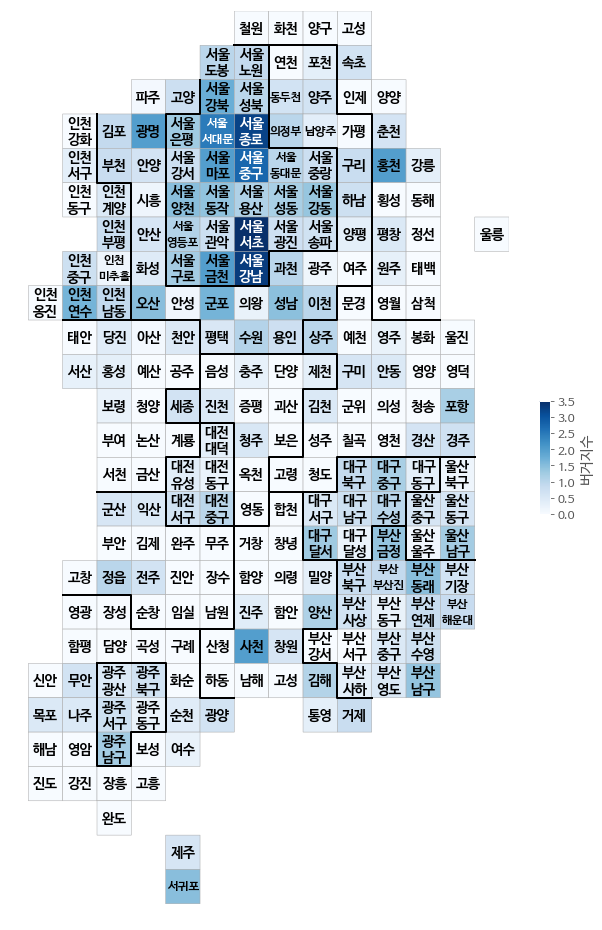

In [224]:
draw_blockcolormap(bgtb, 'OldBgIdx', 0, 3.5, 2.3, 'Blues', 0.75, '버거지수', np.arange(0, 3.6, 0.5), "버거지수2019_구지표_")

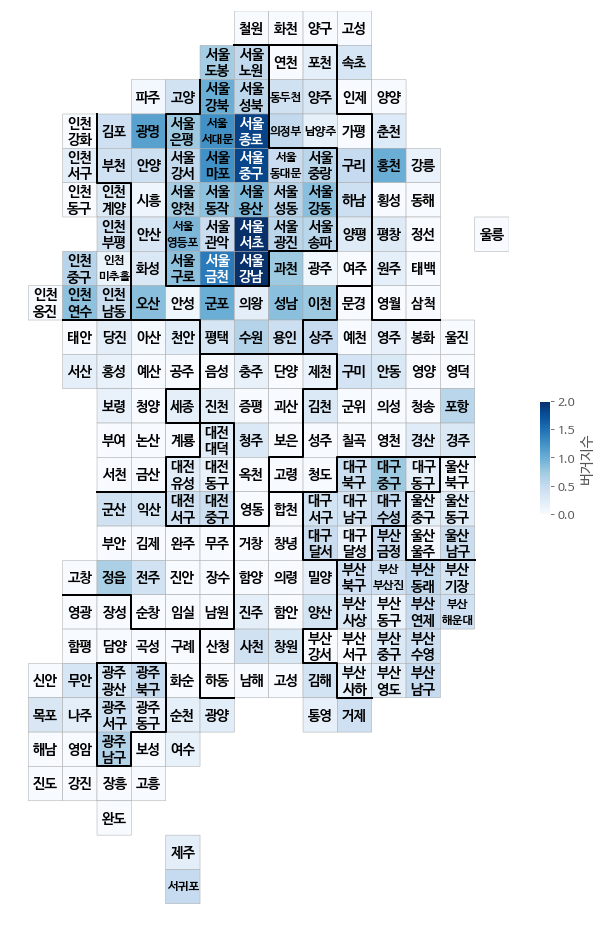

In [225]:
draw_blockcolormap(bgtb, 'NewBgIdx', 0, 2.0, 1.3, 'Blues', 0.75, '버거지수', np.arange(0, 2.1, 0.5), "버거지수2019_신지표_")

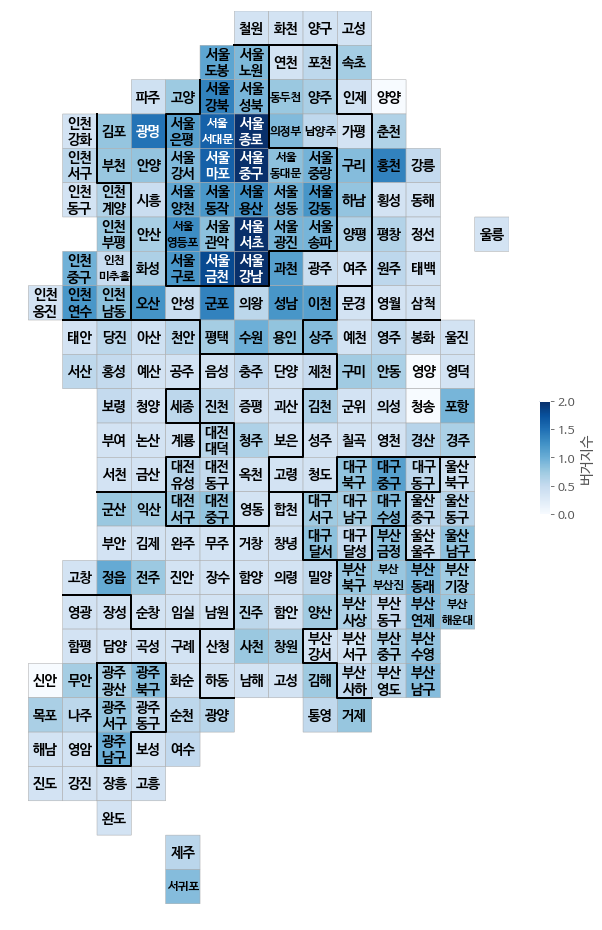

In [266]:
draw_blockcolormap(bgtb, 'NewBgIdx2', 0, 2.0, 1.42, 'Blues', 0.75, '버거지수', np.arange(0, 2.1, 0.5), "버거지수2019_신지표보정_")

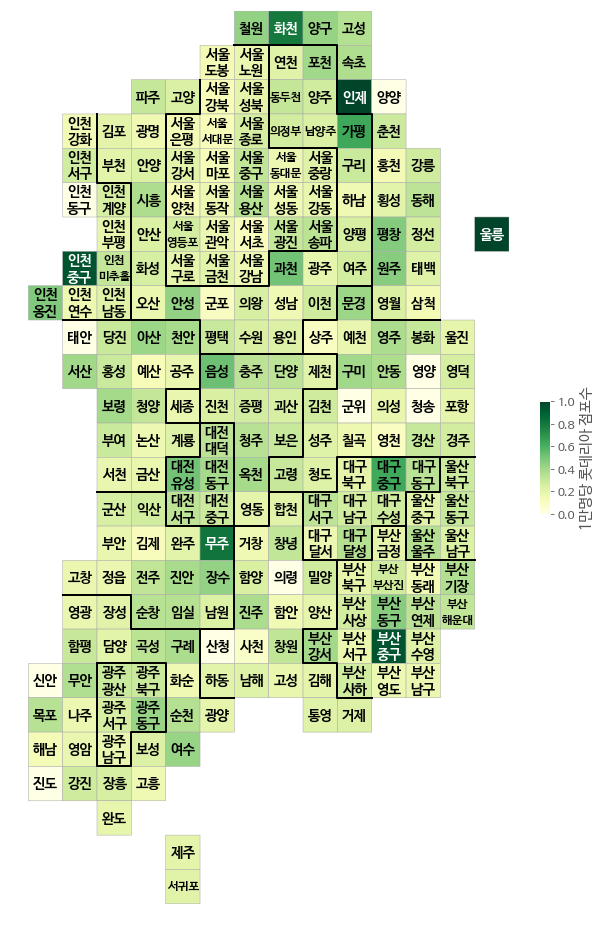

In [268]:
bgtb['Lp10T'] = bgtb['L'] / bgtb['population'] * 10000
draw_blockcolormap(bgtb, 'Lp10T', 0, 1, 0.75, 'YlGn', 1, '1만명당 롯데리아 점포수', np.arange(0, 1.1, 0.2), "만명당롯데리아_")

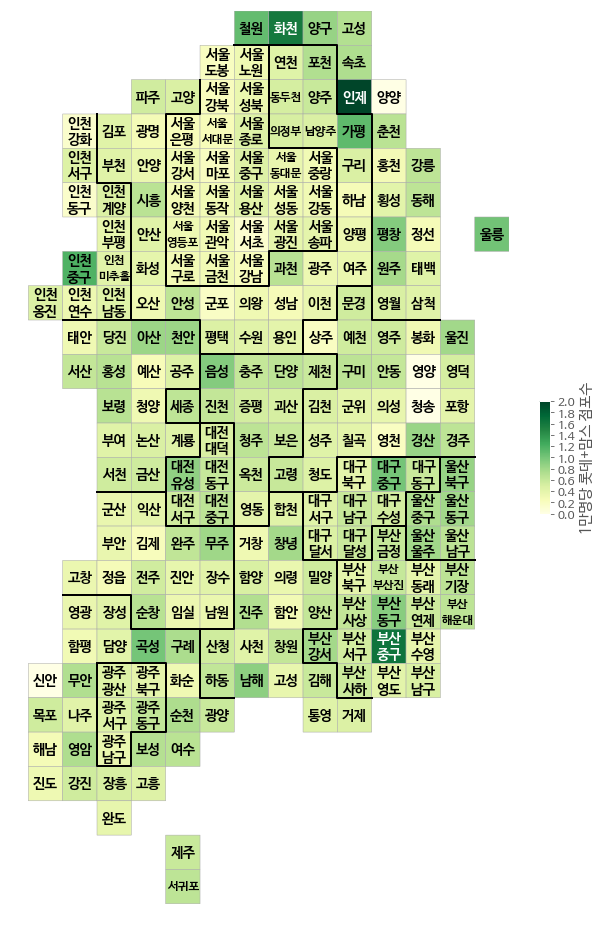

In [272]:
bgtb['LMSp10T'] = bgtb['LMS'] / bgtb['population'] * 10000
draw_blockcolormap(bgtb, 'LMSp10T', 0, 2, 1.35, 'YlGn', 1, '1만명당 롯데+맘스 점포수', np.arange(0, 2.1, 0.2), "만명당롯리+맘터_")

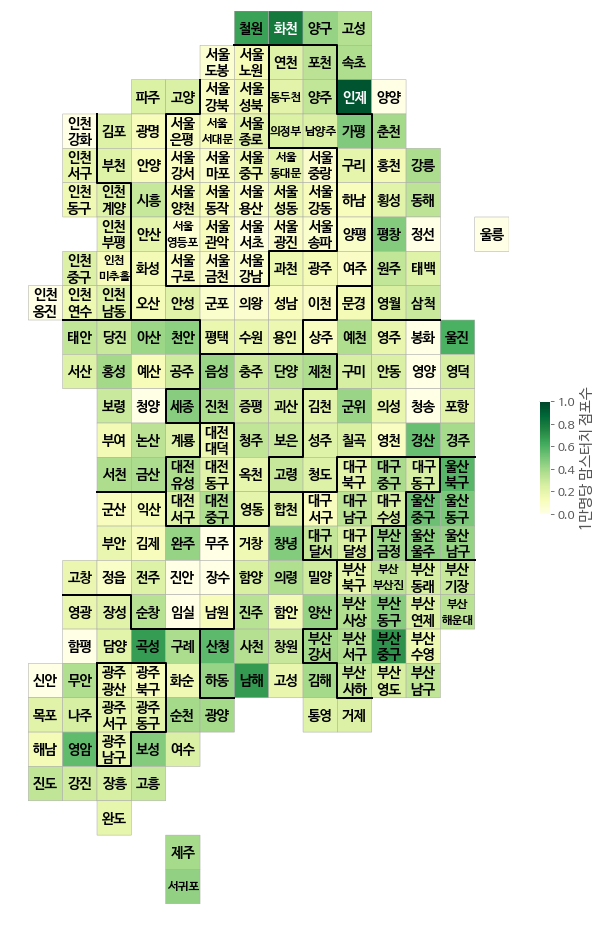

In [271]:
bgtb['MSp10T'] = bgtb['MS'] / bgtb['population'] * 10000
draw_blockcolormap(bgtb, 'MSp10T', 0, 1, 0.75, 'YlGn', 1, '1만명당 맘스터치 점포수', np.arange(0, 1.1, 0.2), "만명당맘스터치_")

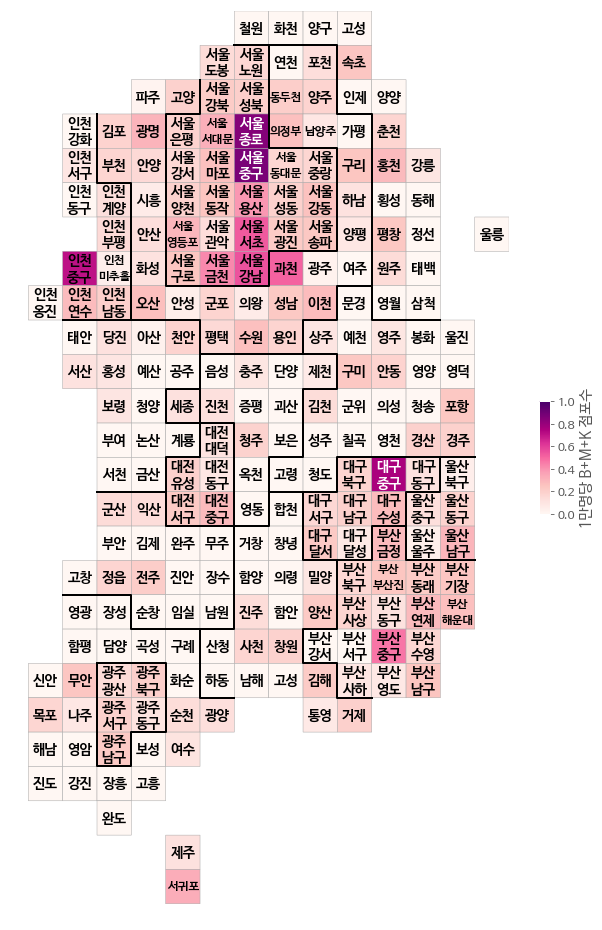

In [274]:
bgtb['BMKp10T'] = bgtb['BMK'] / bgtb['population'] * 10000
draw_blockcolormap(bgtb, 'BMKp10T', 0, 1, 0.75, 'RdPu', 1, '1만명당 B+M+K 점포수', np.arange(0, 1.1, 0.2), "만명당BMK_")

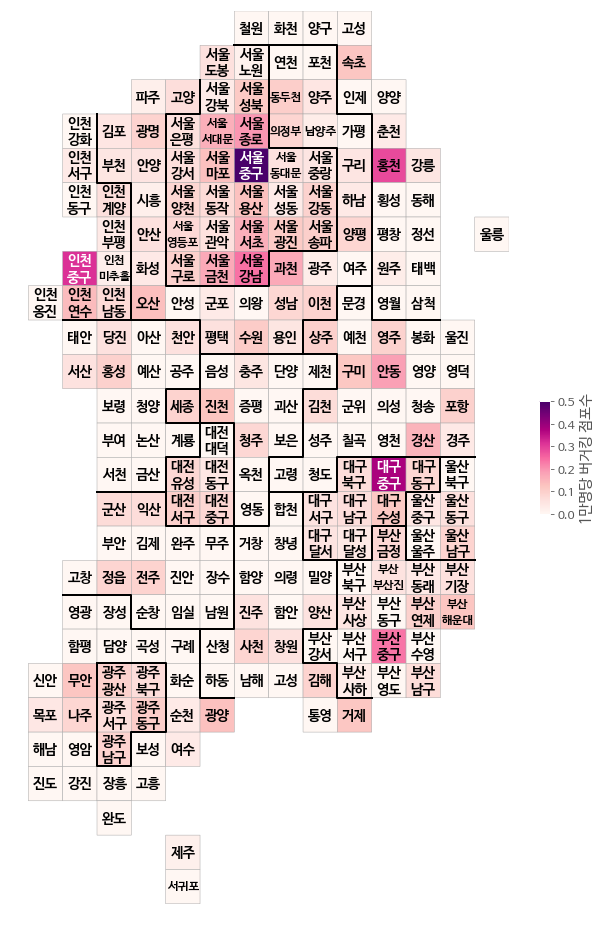

In [275]:
bgtb['Bp10T'] = bgtb['B'] / bgtb['population'] * 10000
draw_blockcolormap(bgtb, 'Bp10T', 0, 0.5, 0.3, 'RdPu', 1, '1만명당 버거킹 점포수', np.arange(0, 0.6, 0.1), "만명당버거킹_")

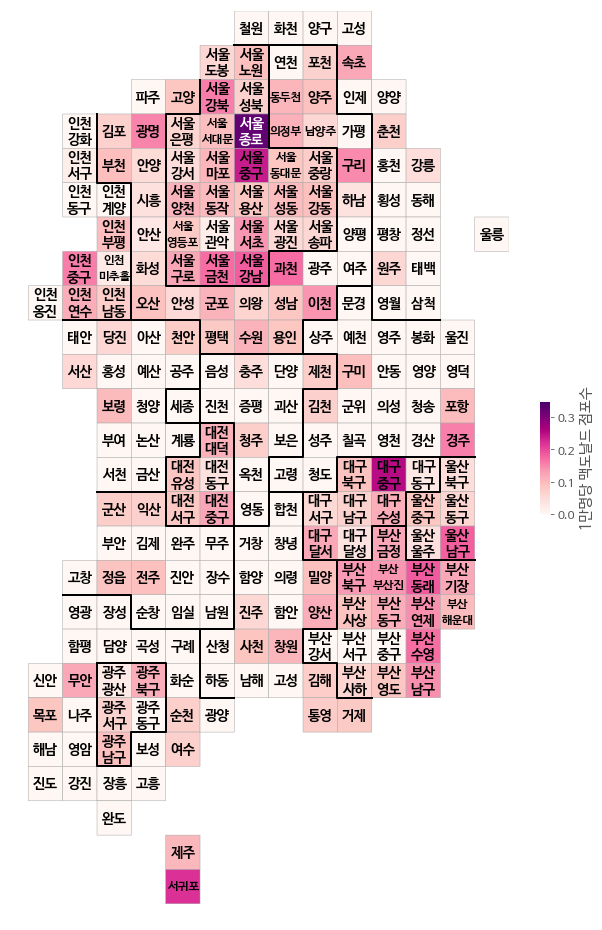

In [276]:
bgtb['Mp10T'] = bgtb['M'] / bgtb['population'] * 10000
draw_blockcolormap(bgtb, 'Mp10T', 0, 0.35, 0.3, 'RdPu', 1, '1만명당 맥도날드 점포수', np.arange(0, 0.45, 0.1), "만명당맥도날드_")

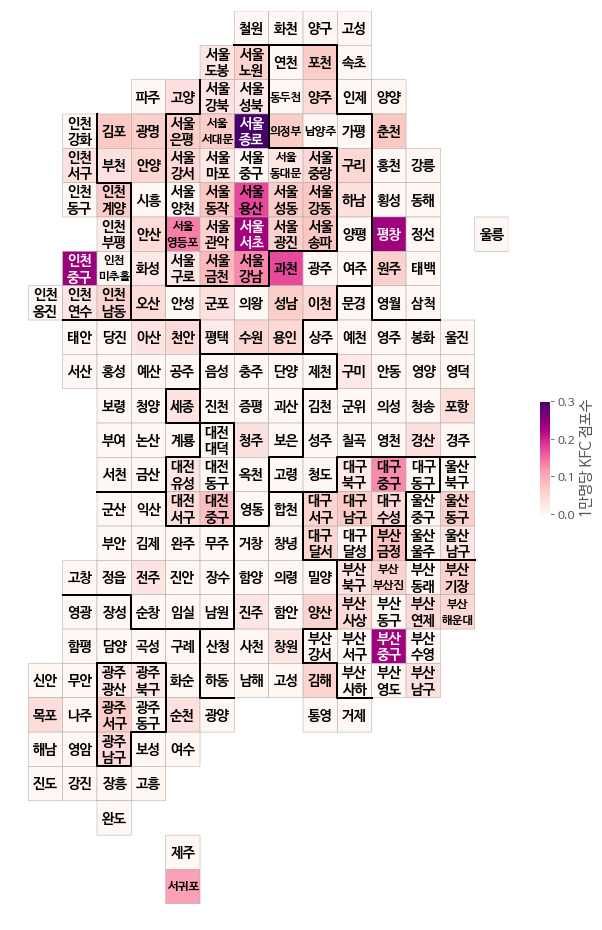

In [277]:
bgtb['Kp10T'] = bgtb['K'] / bgtb['population'] * 10000
draw_blockcolormap(bgtb, 'Kp10T', 0, 0.3, 0.181, 'RdPu', 1, '1만명당 KFC 점포수', np.arange(0, 0.4, 0.1), "만명당KFC_")

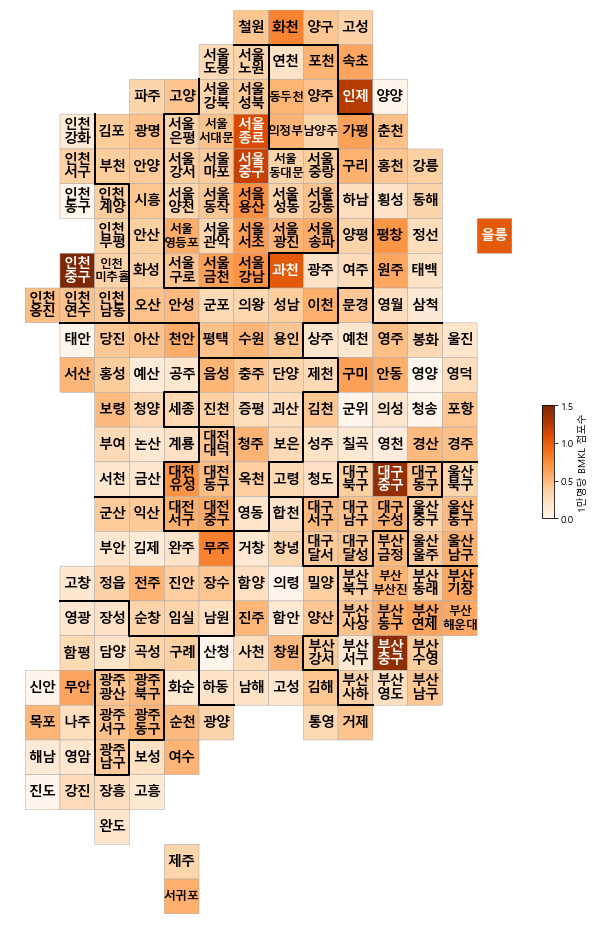

In [76]:
bgtb['BMKLp10T'] = (bgtb['BMK']+bgtb['L']) / bgtb['population'] * 10000
draw_blockcolormap(bgtb, 'BMKLp10T', 0, 1.5, 1.01, 'Oranges', 1, '1만명당 BMKL 점포수', np.arange(0, 1.6, 0.5), "만명당BMKL_")

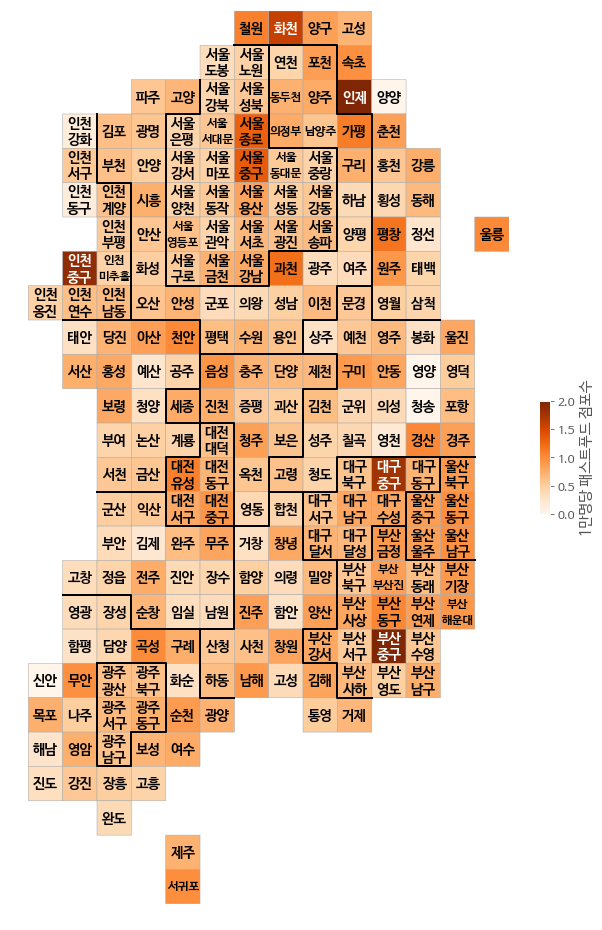

In [283]:
bgtb['BMKLMSp10T'] = (bgtb['BMK']+bgtb['LMS']) / bgtb['population'] * 10000
draw_blockcolormap(bgtb, 'BMKLMSp10T', 0, 2.0, 1.4, 'Oranges', 1, '1만명당 패스트푸드 점포수', np.arange(0, 2.1, 0.5), "만명당패스트푸드_")

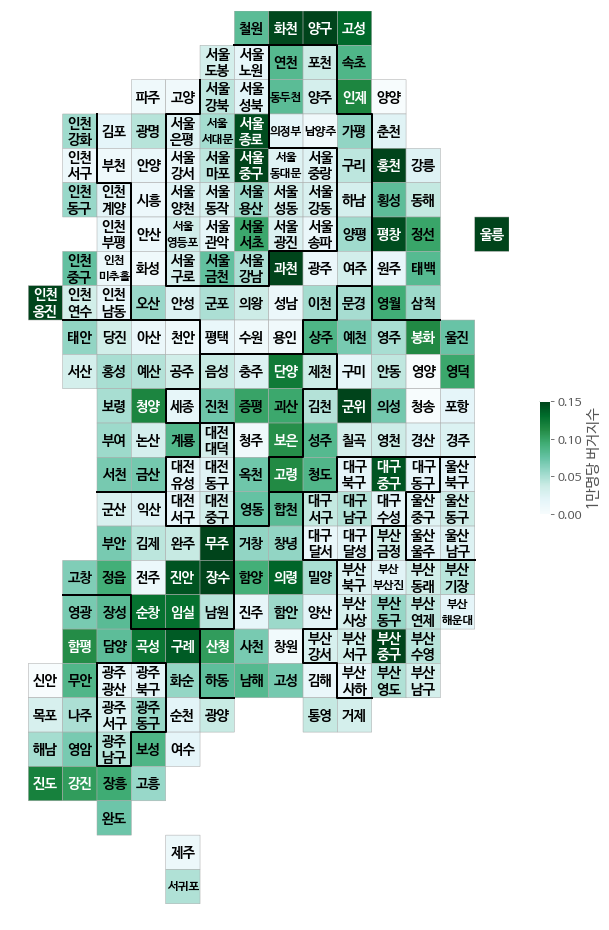

In [287]:
bgtb['BIp10T'] = bgtb['NewBgIdx2'] / bgtb['population'] * 10000
draw_blockcolormap(bgtb, 'BIp10T', 0, 0.15, 0.10, 'BuGn', 1, '1만명당 버거지수', np.arange(0, 0.16, 0.05), "만명당BIdx_")

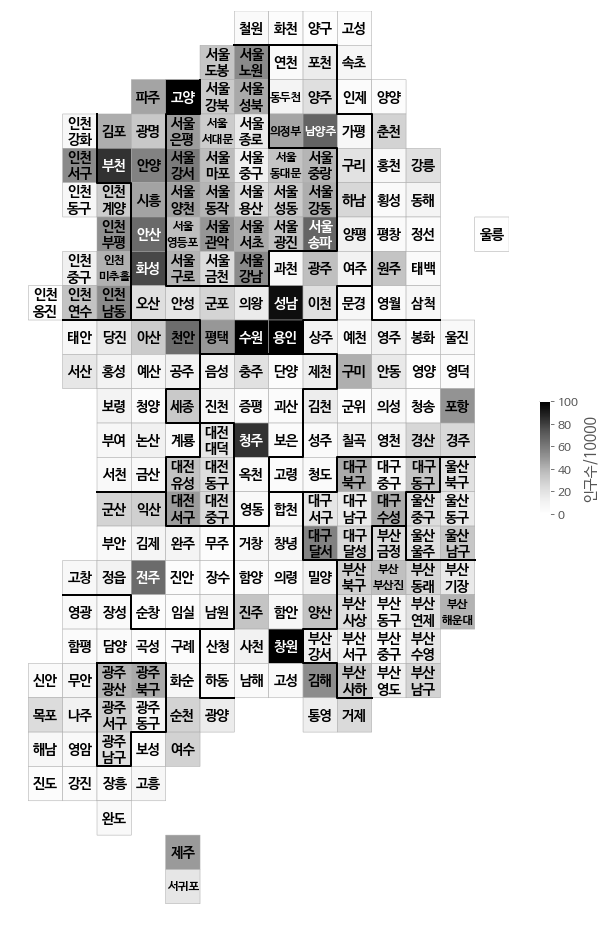

In [295]:
bgtb['Pop10'] = bgtb['population']/10000
draw_blockcolormap(bgtb, 'Pop10', 0, 100, 65, 'Greys', 1, '인구수/10000', np.arange(0, 101, 20), "인구수10000")